In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd

2023-08-23 05:31:48.049423: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-23 05:31:49.255651: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
sentences = [
    'My favorite food is ice cream',
    'do you like ice cream too?',
    'My dog likes ice cream!',
    "your favorite flavor of icecream is chocolate",
    "chocolate isn't good for dogs",
    "your dog, your cat, and your parrot prefer broccoli"
]

# Optionally set the max number of words to tokenize.
# The out of vocabulary (OOV) token represents words that are not in the index.
# Call fit_on_text() on the tokenizer to generate unique numbers for each word
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

tokenizer

In [3]:
# Examine the word index
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'your': 2, 'ice': 3, 'cream': 4, 'my': 5, 'favorite': 6, 'is': 7, 'dog': 8, 'chocolate': 9, 'food': 10, 'do': 11, 'you': 12, 'like': 13, 'too': 14, 'likes': 15, 'flavor': 16, 'of': 17, 'icecream': 18, "isn't": 19, 'good': 20, 'for': 21, 'dogs': 22, 'cat': 23, 'and': 24, 'parrot': 25, 'prefer': 26, 'broccoli': 27}


In [4]:
# Get the number for a given word
print(word_index['favorite'])

6


In [5]:
print(len(word_index), word_index['icecream'], word_index['ice'], word_index['cream'])

27 18 3 4


In [6]:
sequences = tokenizer.texts_to_sequences(sentences)
print (sequences)

[[5, 6, 10, 7, 3, 4], [11, 12, 13, 3, 4, 14], [5, 8, 15, 3, 4], [2, 6, 16, 17, 18, 7, 9], [9, 19, 20, 21, 22], [2, 8, 2, 23, 24, 2, 25, 26, 27]]


In [7]:
sentences2 = [
    "I like hot chocolate",
    "My dogs and my hedgehog like kibble but my squirrel prefers grapes and my chickens like ice cream, preferably vanilla"]

sequences2 = tokenizer.texts_to_sequences(sentences2)
print(sequences2)

[[1, 13, 1, 9], [5, 22, 24, 5, 1, 13, 1, 1, 5, 1, 1, 1, 24, 5, 1, 13, 3, 4, 1, 1]]


In [8]:
padded = pad_sequences(sequences)
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:", padded)



Word Index =  {'<OOV>': 1, 'your': 2, 'ice': 3, 'cream': 4, 'my': 5, 'favorite': 6, 'is': 7, 'dog': 8, 'chocolate': 9, 'food': 10, 'do': 11, 'you': 12, 'like': 13, 'too': 14, 'likes': 15, 'flavor': 16, 'of': 17, 'icecream': 18, "isn't": 19, 'good': 20, 'for': 21, 'dogs': 22, 'cat': 23, 'and': 24, 'parrot': 25, 'prefer': 26, 'broccoli': 27}

Sequences =  [[5, 6, 10, 7, 3, 4], [11, 12, 13, 3, 4, 14], [5, 8, 15, 3, 4], [2, 6, 16, 17, 18, 7, 9], [9, 19, 20, 21, 22], [2, 8, 2, 23, 24, 2, 25, 26, 27]]

Padded Sequences: [[ 0  0  0  5  6 10  7  3  4]
 [ 0  0  0 11 12 13  3  4 14]
 [ 0  0  0  0  5  8 15  3  4]
 [ 0  0  2  6 16 17 18  7  9]
 [ 0  0  0  0  9 19 20 21 22]
 [ 2  8  2 23 24  2 25 26 27]]


In [9]:
padded = pad_sequences(sequences, maxlen=15)
print(padded)

[[ 0  0  0  0  0  0  0  0  0  5  6 10  7  3  4]
 [ 0  0  0  0  0  0  0  0  0 11 12 13  3  4 14]
 [ 0  0  0  0  0  0  0  0  0  0  5  8 15  3  4]
 [ 0  0  0  0  0  0  0  0  2  6 16 17 18  7  9]
 [ 0  0  0  0  0  0  0  0  0  0  9 19 20 21 22]
 [ 0  0  0  0  0  0  2  8  2 23 24  2 25 26 27]]


In [10]:
# Put the padding at the end of the sequences
padded = pad_sequences(sequences, maxlen=15, padding="post")
print(padded)

[[ 5  6 10  7  3  4  0  0  0  0  0  0  0  0  0]
 [11 12 13  3  4 14  0  0  0  0  0  0  0  0  0]
 [ 5  8 15  3  4  0  0  0  0  0  0  0  0  0  0]
 [ 2  6 16 17 18  7  9  0  0  0  0  0  0  0  0]
 [ 9 19 20 21 22  0  0  0  0  0  0  0  0  0  0]
 [ 2  8  2 23 24  2 25 26 27  0  0  0  0  0  0]]


In [11]:
padded = pad_sequences(sequences, maxlen=3)
print(padded)

padded = pad_sequences(sequences, maxlen=3, truncating='post')
print(padded)

[[ 7  3  4]
 [ 3  4 14]
 [15  3  4]
 [18  7  9]
 [20 21 22]
 [25 26 27]]
[[ 5  6 10]
 [11 12 13]
 [ 5  8 15]
 [ 2  6 16]
 [ 9 19 20]
 [ 2  8  2]]


In [12]:
# Try turning sentences that contain words that 
# aren't in the word index into sequences.
# Add your own sentences to the test_data
test_data = [
    "my best friend's favorite ice cream flavor is strawberry",
    "my dog's best friend is a manatee"
]
print (test_data)

# Remind ourselves which number corresponds to the
# out of vocabulary token in the word index
print("<OOV> has the number", word_index['<OOV>'], "in the word index.")

# Convert the test sentences to sequences
test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

# Pad the new sequences
padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")

# Notice that "1" appears in the sequence wherever there's a word 
# that's not in the word index
print(padded)

["my best friend's favorite ice cream flavor is strawberry", "my dog's best friend is a manatee"]
<OOV> has the number 1 in the word index.

Test Sequence =  [[5, 1, 1, 6, 3, 4, 16, 7, 1], [5, 1, 1, 1, 7, 1, 1]]

Padded Test Sequence: 
[[ 0  5  1  1  6  3  4 16  7  1]
 [ 0  0  0  5  1  1  1  7  1  1]]


# Dataset

In [13]:
path = tf.keras.utils.get_file('reviews.csv', 'https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')
print (path)

/home/amira/.keras/datasets/reviews.csv


In [14]:
# Read the csv file
dataset = pd.read_csv(path)

# Review the first few entries in the dataset
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [15]:
# Get the reviews from the text column
reviews = dataset['text'].tolist()
reviews

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say I wasted my money.',
 'What a waste of money and time!.',
 'And the sound quality is great.',
 'He was very impressed when going from the original battery to the extended battery.',
 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.',
 'Very good quality though',
 'The design is very odd as the ear "clip" is not very comfortable at all.',
 'Highly recommend for any one who has a blue tooth phone.',
 'I advise EVERYONE D

In [16]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(reviews)

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)


3261
{'<OOV>': 1, 'the': 2, 'and': 3, 'i': 4, 'a': 5, 'it': 6, 'to': 7, 'is': 8, 'was': 9, 'this': 10, 'of': 11, 'not': 12, 'for': 13, 'my': 14, 'in': 15, 'with': 16, 'very': 17, 'good': 18, 'great': 19, 'phone': 20, 'that': 21, 'on': 22, 'have': 23, 'you': 24, 'food': 25, 'had': 26, 'place': 27, 'so': 28, 'but': 29, 'service': 30, 'are': 31, 'be': 32, 'we': 33, 'all': 34, 'as': 35, 'at': 36, 'like': 37, 'they': 38, 'time': 39, 'back': 40, 'one': 41, 'were': 42, 'quality': 43, 'would': 44, 'really': 45, 'here': 46, 'if': 47, 'from': 48, 'well': 49, 'your': 50, 'just': 51, 'product': 52, 'up': 53, 'best': 54, "don't": 55, 'no': 56, 'will': 57, 'an': 58, 'there': 59, 'go': 60, 'me': 61, 'has': 62, 'only': 63, 'also': 64, 'works': 65, "i've": 66, 'out': 67, 'headset': 68, 'nice': 69, 'ever': 70, 'battery': 71, "it's": 72, 'sound': 73, 'than': 74, 'use': 75, 'or': 76, 'when': 77, "i'm": 78, 'our': 79, 'get': 80, 'what': 81, 'their': 82, 'after': 83, 'love': 84, 'been': 85, 'did': 86, 'exce

In [17]:
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, padding='post')

# What is the shape of the vector containing the padded sequences?
# The shape shows the number of sequences and the length of each one.
print(padded_sequences.shape)

# What is the first review?
print (reviews[0])

# Show the sequence for the first review
print(padded_sequences[0])

# Try printing the review and padded sequence for other elements.

(1992, 139)
So there is no way for me to plug it in here in the US unless I go by a converter.
[  28   59    8   56  142   13   61    7  269    6   15   46   15    2
  149  449    4   60  113    5 1429    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [18]:
pad_sequences

<function keras.utils.data_utils.pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)>

# Embedding

In [19]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd


In [20]:
!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

/bin/bash: /home/amira/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-08-23 05:32:05--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 142.250.4.113, 142.250.4.139, 142.250.4.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.4.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l74f4q20j0ke8ibtcg17m61sbibgrbhq/1692743475000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=bf247c05-faab-486e-aad2-de6626658f72 [following]
--2023-08-23 05:32:06--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l74f4q20j0ke8ibtcg17m61sbibgrbhq/1692743475000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=bf247c05-faab-486e-aad2-de6626658f72
Resolving doc-08-ak-docs.googleusercontent

In [3]:
dataset = pd.read_csv('/tmp/sentiment.csv')

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [11]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

good case excellent value ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Good case Excellent value.


In [12]:
# Build a basic sentiment network
# Note the embedding layer is first, 
# and the output is only 1 node as it is either 0 or 1 (negative or positive)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [20]:
num_epochs = 30
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 0s 7ms/step - loss: 0.1790 - accuracy: 0.9328 - val_loss: 0.6014 - val_accuracy: 0.7368
Epoch 2/30
50/50 [==============================] - 0s 3ms/step - loss: 0.1786 - accuracy: 0.9247 - val_loss: 0.6456 - val_accuracy: 0.7168
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.1731 - accuracy: 0.9316 - val_loss: 0.6733 - val_accuracy: 0.7043
Epoch 4/30
50/50 [==============================] - 0s 6ms/step - loss: 0.1766 - accuracy: 0.9328 - val_loss: 0.6294 - val_accuracy: 0.7218
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.1727 - accuracy: 0.9303 - val_loss: 0.6295 - val_accuracy: 0.7318
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - loss: 0.1702 - accuracy: 0.9335 - val_loss: 0.6050 - val_accuracy: 0.7444
Epoch 7/30
50/50 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.9353 - val_loss: 0.6068 - val_accuracy: 0.7469
Epoch 8/30
50/50 [==

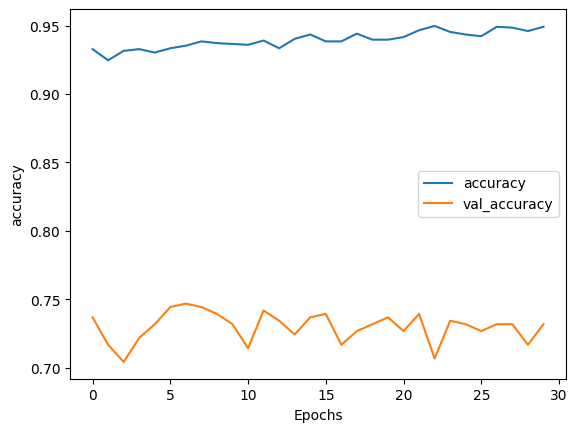

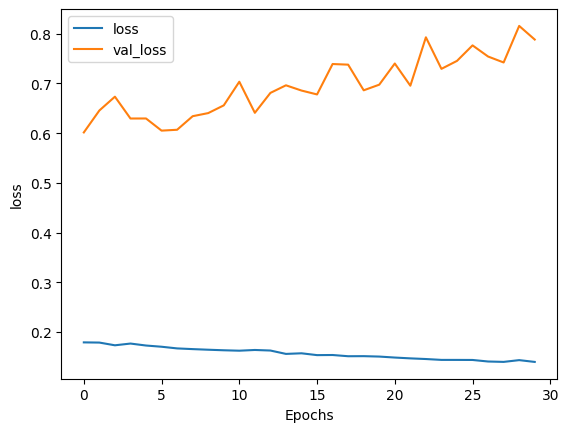

In [21]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [22]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [23]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [19]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 [==============================] - 0s 44ms/step
I love this phone
[0.9816809]


I hate spaghetti
[0.03933761]


Everything was cold
[0.6288253]


Everything was hot exactly as I wanted
[0.3701731]


Everything was green
[0.6288253]


the host seated us immediately
[0.733114]


they gave us free chocolate cake
[0.97627187]


not sure about the wilted flowers on the table
[0.0194954]


only works when I stand on tippy toes
[0.9780327]


does not work when I stand on my head
[0.01309354]




# Subword

In [21]:
import pandas as pd

dataset = pd.read_csv('/tmp/sentiment.csv')

# Just extract out sentences and labels first - we will create subwords here
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [22]:
import tensorflow_datasets as tfds

vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=5)

In [23]:
# Check that the tokenizer works appropriately
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)
# Separately print out each subword, decoded
for i in encoded:
  print(tokenizer.decode([i]))

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]
I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


In [24]:
for i, sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)
    

In [26]:
# Check the sentences are appropriately replaced
print(sentences[1])
print(sentences[num])

[625, 677, 626, 274, 380, 633, 148, 844, 789]
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [27]:
import numpy as np

max_length = 50
trunc_type='post'
padding_type='post'

# Pad all sentences
sentences_padded = pad_sequences(sentences, maxlen=max_length, 
                                 padding=padding_type, truncating=trunc_type)

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences_padded[0:training_size]
testing_sentences = sentences_padded[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [28]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


2023-08-23 05:34:59.224288: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-23 05:34:59.433107: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-23 05:34:59.433812: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf